# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#from scipy.stats import stats
import scipy.stats as stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try: 
        response  = requests.get(city_url)

        # Parse the JSON and retrieve data
        city_weather  = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

         # Append the City information into city_data list
        city_data.append({"City": city, 
                           "Lat": city_lat, 
                           "Lng": city_lng, 
                           "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

#  If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | nicoya
Processing Record 5 of Set 1 | port mathurin
Processing Record 6 of Set 1 | utrik
Processing Record 7 of Set 1 | mabaruma
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | tawau
Processing Record 12 of Set 1 | rio pardo de minas
Processing Record 13 of Set 1 | udachny
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | kharp
Processing Record 16 of Set 1 | malakal
Processing Record 17 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | el bauga
Processing Record 21 of Set 1 | taitung city
Processing Record 22 of

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,1.75,82,100,7.90,RU,1723494025
1,ushuaia,-54.8000,-68.3000,5.81,61,20,3.09,AR,1723493765
2,yellowknife,62.4560,-114.3525,26.29,38,100,3.09,CA,1723494025
3,nicoya,10.1483,-85.4520,28.40,76,100,1.48,CR,1723493447
4,port mathurin,-19.6833,63.4167,22.03,69,99,10.29,MU,1723494025
...,...,...,...,...,...,...,...,...,...
564,male,4.1748,73.5089,28.97,79,75,9.26,MV,1723494090
565,sisimiut,66.9395,-53.6735,8.86,69,16,1.76,GL,1723494090
566,tamandare,-8.7597,-35.1047,25.21,76,0,3.51,BR,1723494090
567,voskresenskoye,56.8381,45.4317,11.54,94,99,3.85,RU,1723494091


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,1.75,82,100,7.90,RU,1723494025
1,ushuaia,-54.8000,-68.3000,5.81,61,20,3.09,AR,1723493765
2,yellowknife,62.4560,-114.3525,26.29,38,100,3.09,CA,1723494025
3,nicoya,10.1483,-85.4520,28.40,76,100,1.48,CR,1723493447
4,port mathurin,-19.6833,63.4167,22.03,69,99,10.29,MU,1723494025


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,1.75,82,100,7.90,RU,1723494025
1,ushuaia,-54.8000,-68.3000,5.81,61,20,3.09,AR,1723493765
2,yellowknife,62.4560,-114.3525,26.29,38,100,3.09,CA,1723494025
3,nicoya,10.1483,-85.4520,28.40,76,100,1.48,CR,1723493447
4,port mathurin,-19.6833,63.4167,22.03,69,99,10.29,MU,1723494025


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

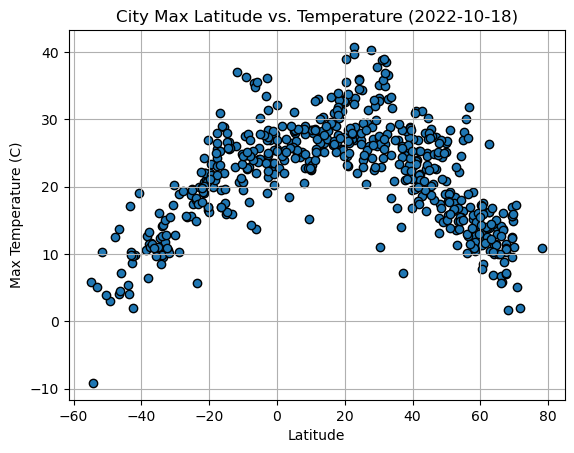

In [8]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig01.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

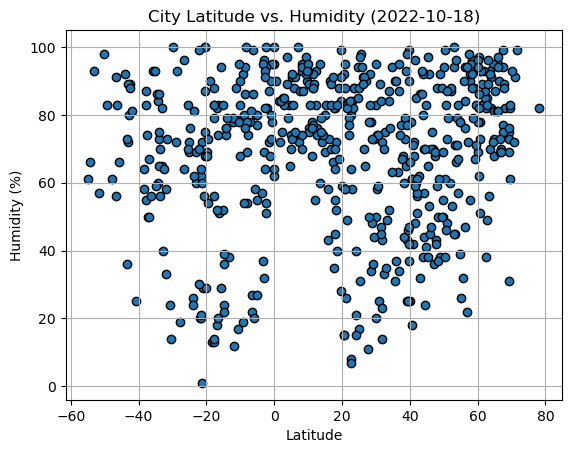

In [9]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig02.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

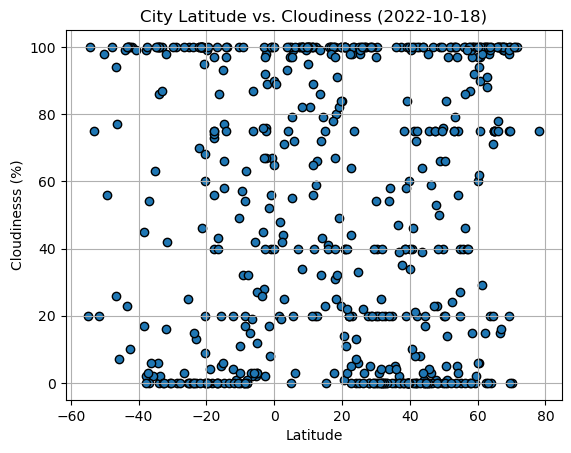

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudinesss (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig03.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

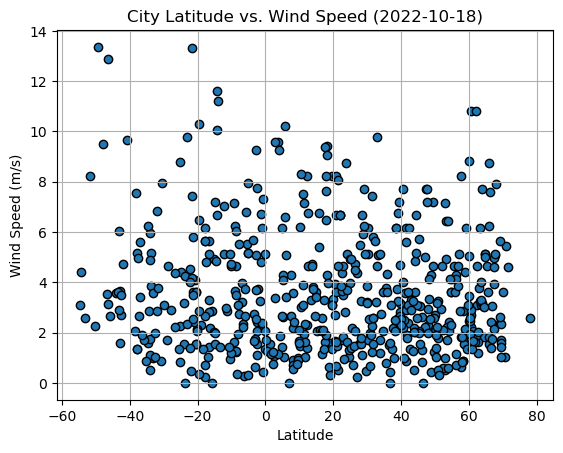

In [11]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig04.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def Plot_Linear_Regression(x_values, y_values):
   (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
   regress_values = x_values * slope + intercept
   line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   plt.plot(x_values, regress_values, color = "red")
   
   return[line_eq, rvalue]

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,1.75,82,100,7.90,RU,1723494025
2,yellowknife,62.4560,-114.3525,26.29,38,100,3.09,CA,1723494025
3,nicoya,10.1483,-85.4520,28.40,76,100,1.48,CR,1723493447
5,utrik,11.2278,169.8474,28.14,78,100,7.51,MH,1723493444
6,mabaruma,8.2000,-59.7833,27.79,93,34,0.92,GY,1723494026


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,5.81,61,20,3.09,AR,1723493765
4,port mathurin,-19.6833,63.4167,22.03,69,99,10.29,MU,1723494025
8,adamstown,-25.0660,-130.1015,19.58,69,100,8.78,PN,1723494026
9,margaret river,-33.9500,115.0667,14.19,73,86,5.98,AU,1723494026
11,rio pardo de minas,-15.6097,-42.5397,28.86,29,5,2.86,BR,1723494026


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7025201857376615


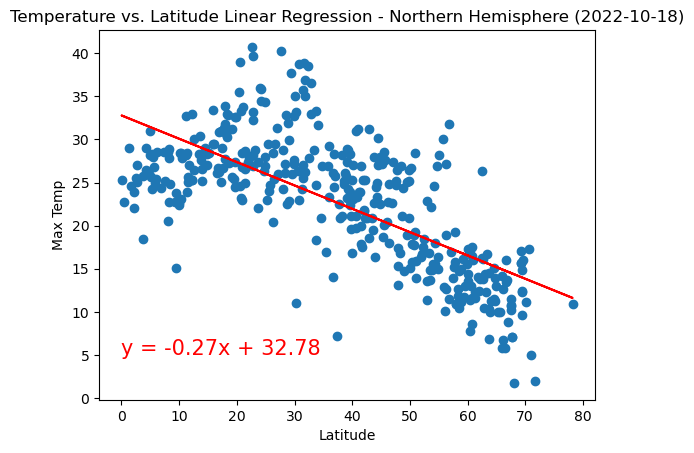

In [24]:
# Linear regression on Northern Hemisphere

# Call Function Plot_Linear_Regression
label = Plot_Linear_Regression (northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.annotate(label[0],(0,5),fontsize=15,color="red")
plt.title("Temperature vs. Latitude Linear Regression - Northern Hemisphere (2022-10-18)")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(False)

#print r-value
print(f"The r-value is: {label[1]}")

# Save the figure
plt.savefig("output_data/Fig05.png")

# Show plot
plt.show()

The r-value is: 0.8285110306603868


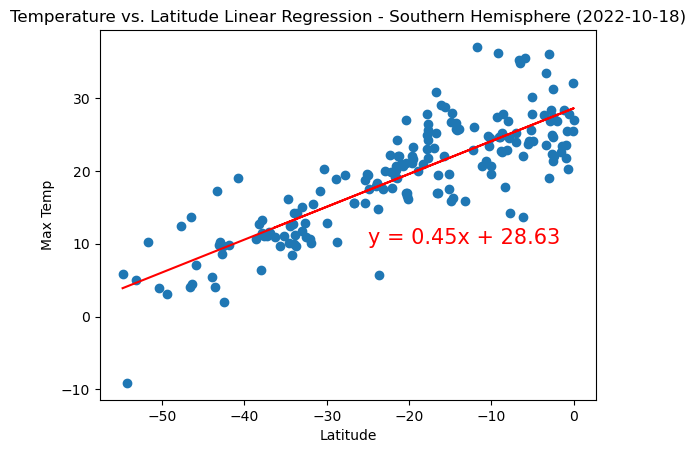

In [25]:
# Linear regression on Southern Hemisphere

# Call Function Plot_Linear_Regression
label = Plot_Linear_Regression (southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.annotate(label[0],(-25,10),fontsize=15,color="red")
plt.title("Temperature vs. Latitude Linear Regression - Southern Hemisphere (2022-10-18)")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(False)

#print r-value
print(f"The r-value is: {label[1]}")

# Save the figure
plt.savefig("output_data/Fig06.png")

# Show plot
plt.show()

TEMPERATURE VS LATITUDE LINEAR REGRESSION PLOT (FIG05 & FIG06)
When examining the linear regression plot of Temperature vs Latitude for the Northern Hemisphere you immediately can see a strong negative correlation showing higher city temperatures as the latitude nears the equator and lower city temperatures as the latitude moves away from the equator.  This linear regression appears to show a strong correlation with a definitive negative slope and an r-value of -0.883.  This correlation also makes intuitive sense as temperatures generally tend to rise as locations get closer to the equator and drop as locations mover further away.             
When examining the Linear Regression Plot of Temperature vs Latitude for the Southern Hemisphere we see a weaker positive correlation between higher city temperatures as the latitude.  This linear regression displays a more gradual positive slope and a weaker r-value of 0.517.  A potential explanation of the weaker linear regression seen in the southern hemisphere could potentially be due to a significantly smaller human population in the southern hemisphere vs the norther hemisphere, allowing southern hemisphere cities to be more spread out geographically. 


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.016470548685754892


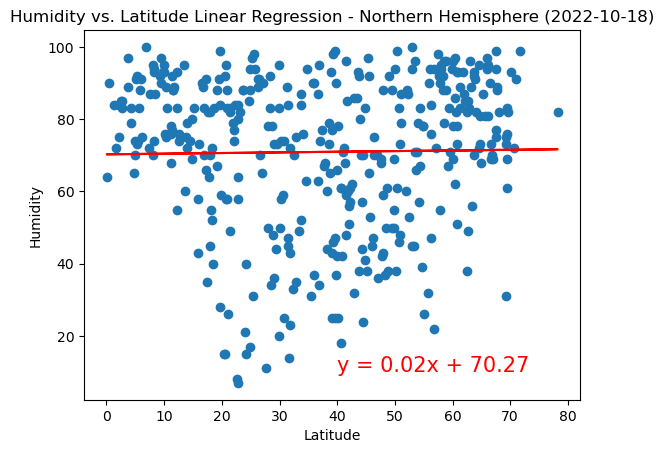

In [26]:
# Northern Hemisphere

# Call Function Plot_Linear_Regression
label = Plot_Linear_Regression (northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.annotate(label[0],(40,10),fontsize=15,color="red")
plt.title("Humidity vs. Latitude Linear Regression - Northern Hemisphere (2022-10-18)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(False)

#print r-value
print(f"The r-value is: {label[1]}")

# Save the figure
plt.savefig("output_data/Fig07.png")

# Show plot
plt.show()

The r-value is: 0.01057716566721825


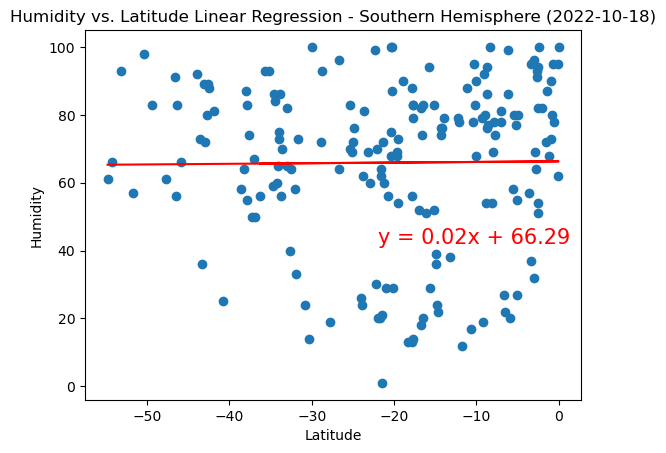

In [28]:
# Southern Hemisphere

# Call Function Plot_Linear_Regression
label = Plot_Linear_Regression (southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.annotate(label[0],(-22,42),fontsize=15,color="red")
plt.title("Humidity vs. Latitude Linear Regression - Southern Hemisphere (2022-10-18)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(False)

#print r-value
print(f"The r-value is: {label[1]}")

# Save the figure
plt.savefig("output_data/Fig08.png")

# Show plot
plt.show()

HUMIDITY VS LATITUDE LINEAR REGRESSION PLOT (FIG07 & FIG08)
The Humidity vs Latitude Linear Regression Plot for the Northern and Southern Hemispheres, both provided a low correlation in the results.  Both lineal regression plots show relatively loose positive correlations between city latitude and humidity, with a r-value in the north at .0457 and a r-value in the south at 0.384.  Neither of these polts show strong considerations for city location in relation to humidity, and it can be assumed that other environmental factors play a much stronger role in determining where a city is to be located.   


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.012889895041266078


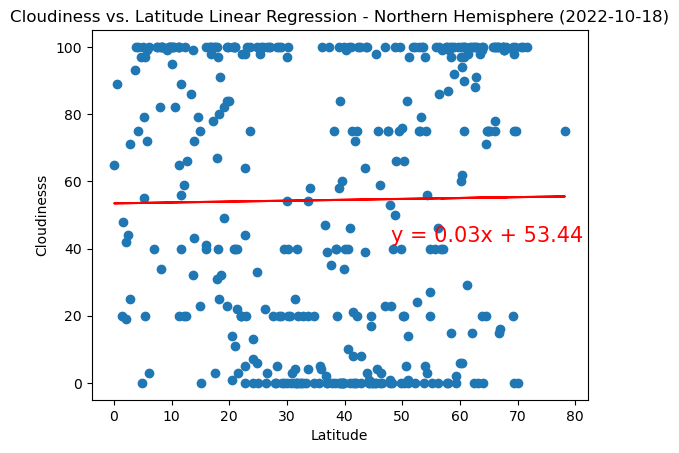

In [29]:
# Northern Hemisphere

# Call Function Plot_Linear_Regression
label = Plot_Linear_Regression (northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.annotate(label[0],(48,42),fontsize=15,color="red")
plt.title("Cloudiness vs. Latitude Linear Regression - Northern Hemisphere (2022-10-18)")
plt.ylabel("Cloudinesss")
plt.xlabel("Latitude")
plt.grid(False)

#print r-value
print(f"The r-value is: {label[1]}")

# Save the figure
plt.savefig("output_data/Fig09.png")

# Show plot
plt.show()

The r-value is: -0.13097396683263604


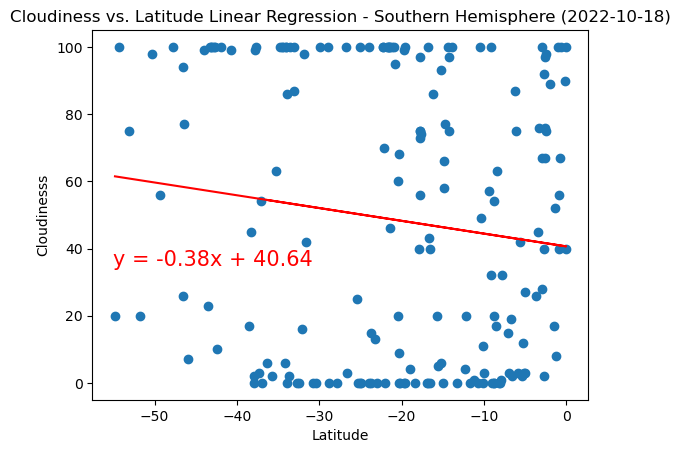

In [30]:
# Southern Hemisphere

# Call Function Plot_Linear_Regression
label = Plot_Linear_Regression (southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.annotate(label[0],(-55,35),fontsize=15,color="red")
plt.title("Cloudiness vs. Latitude Linear Regression - Southern Hemisphere (2022-10-18)")
plt.ylabel("Cloudinesss")
plt.xlabel("Latitude")
plt.grid(False)

#print r-value
print(f"The r-value is: {label[1]}")

# Save the figure
plt.savefig("output_data/Fig10.png")

# Show plot
plt.show()

CLOUDINESS VS LATITUDE LINEAR REGRESSION PLOT (FIG09 & FIG10)
Upon examining Cloudiness vs Latitude Linear Regression Plots for the Northern and Southern Hemispheres both plots show very weak correlations between Cloudiness and City Latitude.  The linear regression plot for both the northern and southern hemispheres shows a gradual positive slope and a r-value of 0.304 for the northern hemisphere and a r-value of 0.271 for the southern hemisphere.  The graphs for both hemispheres point to a weak correlation between city latitude and cloudiness.      


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.029722924202712088


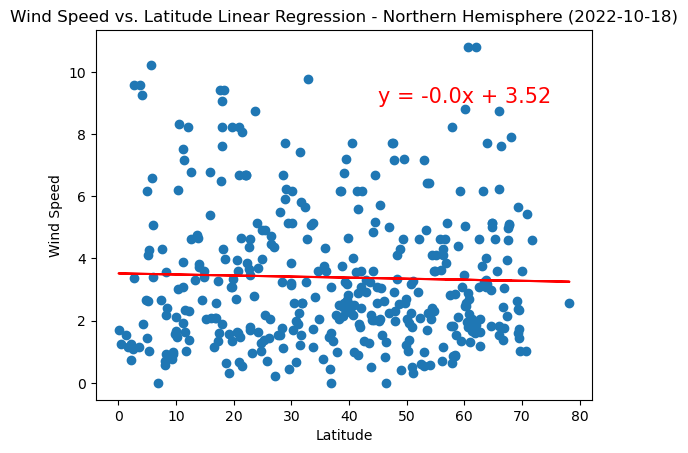

In [33]:
# Northern Hemisphere

# Call Function Plot_Linear_Regression
label = Plot_Linear_Regression (northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.annotate(label[0],(45,9),fontsize=15,color="red")
plt.title("Wind Speed vs. Latitude Linear Regression - Northern Hemisphere (2022-10-18)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(False)

#print r-value
print(f"The r-value is: {label[1]}")

# Save the figure
plt.savefig("output_data/Fig11.png")

# Show plot
plt.show()

The r-value is: -0.0794332803382892


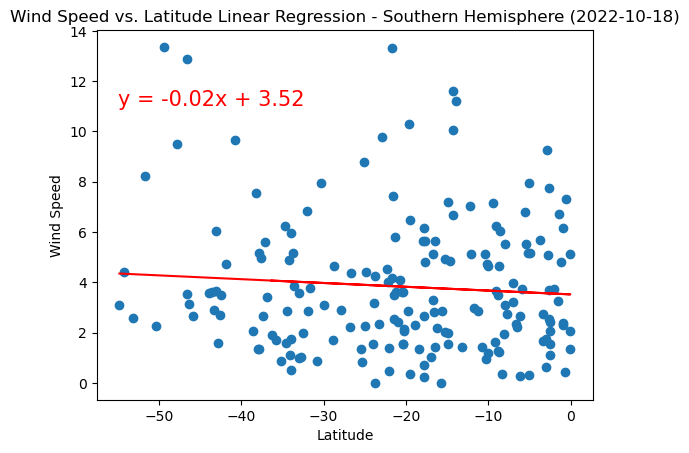

In [35]:
# Southern Hemisphere

# Call Function Plot_Linear_Regression
label = Plot_Linear_Regression (southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.annotate(label[0],(-55,11),fontsize=15,color="red")
plt.title("Wind Speed vs. Latitude Linear Regression - Southern Hemisphere (2022-10-18)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(False)

#print r-value
print(f"The r-value is: {label[1]}")

# Save the figure
plt.savefig("output_data/Fig12.png")

# Show plot
plt.show()

WIND SPEED VS LATITUDE LINEAR REGRESSION PLOT (FIG11 & FIG12)
When looking that the Latitude Linear Regression Plots for Wind Speed vs City Latitude, both plots (northern and southern) show a very low correlation between the variables.  The plot for the northern hemisphere shows an almost horizonal slope with a r-value of 0.065 while the southern hemisphere plot shows a slightly negative slope with an r-value of -0.131.  Both plots display a very low correlation between city latitude and wind speed.
